# Fruit Classifier

### Import required modules and load data file

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [31]:
# #Map drive to access train_building_weather_9-2.csv
# from google.colab import drive
# import os
# drive.mount('/content/drive/')
# os.chdir('/content/drive/My Drive/CP-DSAI/')

In [32]:
fruits = pd.read_csv('fruit_data_with_colors.txt', sep = '\t')

In [33]:
# let's see what's inside
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [34]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = {1:'apple',2:'mandarin',3:'orange',4:'lemon'}
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

In [35]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [36]:
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [37]:
fruits.isnull().any()

fruit_label      False
fruit_name       False
fruit_subtype    False
mass             False
width            False
height           False
color_score      False
dtype: bool

In [38]:
fruits.corr(numeric_only=True)

,fruit_label,mass,width,height,color_score
fruit_label,1.000000,0.032738,-0.298090,0.508766,-0.310521
mass,0.032738,1.000000,0.877687,0.609571,-0.079794
width,-0.298090,0.877687,1.000000,0.396848,-0.076576
height,0.508766,0.609571,0.396848,1.000000,-0.247047
color_score,-0.310521,-0.079794,-0.076576,-0.247047,1.000000


### Examining the data

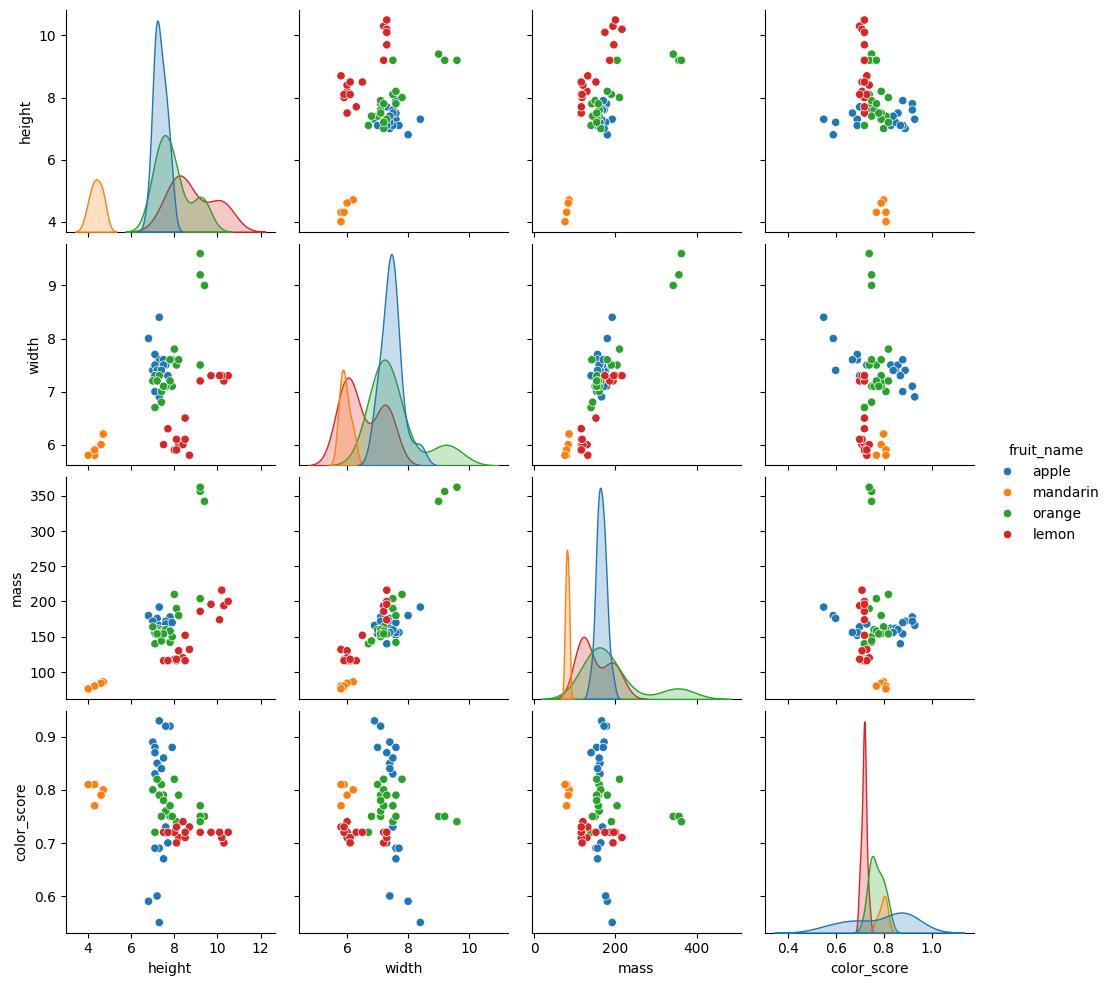

In [39]:
# plotting a scatter matrix

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
sns.pairplot(fruits[['height', 'width', 'mass', 'color_score', 'fruit_name']], hue = "fruit_name")

### Create train-test split

In [40]:
# For this example, we use the mass, width, and height features of each fruit instance
#Write your code here
X = fruits[['height', 'width', 'mass']]
y = fruits['fruit_label']
#--------------------------------------


#Write your code to split data into train and test datasets
# default is 75% / 25% train-test split, test_size, random_state

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=52)

In [41]:
#What's the size of train and test datasets
#Write your code here

X_train.shape, X_test.shape

((44, 3), (15, 3))

### Create classifier object

In [42]:
from sklearn.neighbors import KNeighborsClassifier
#Write your code to create an instance called knn from KNN classifier class

knn = KNeighborsClassifier(n_neighbors=1)

### Train the classifier (fit the estimator) using the training data

In [43]:
#Write code to train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### Estimate the accuracy of the classifier on future data, using the test data. (Evaluate the model's performance to generalize)

In [44]:
knn.score(X_test,y_test)

0.9333333333333333

### Use the trained k-NN classifier model to classify new, previously unseen objects

In [45]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
#Write code to use the estimator to classify fruit type based on the above information
#------------------------
small_fruit = pd.DataFrame({"height": [5.5], "width": [4.3], "mass": [20]}) # 'height', 'width', 'mass'
print("PREDICTION IS:", lookup_fruit_name[knn.predict(small_fruit).item()])

PREDICTION IS: mandarin


In [46]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
#Write code to use the estimator to classify fruit type based on the above information
#------------------------

large_fruit = pd.DataFrame({"height": [8.5], "width": [6.3], "mass": [100]}) # 'height', 'width', 'mass'
print("PREDICTION IS:", lookup_fruit_name[knn.predict(large_fruit).item()])

PREDICTION IS: lemon


### Plot the decision boundaries of the k-NN classifier

d:\DataScience\Anaconda3\envs\dl4cv\lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


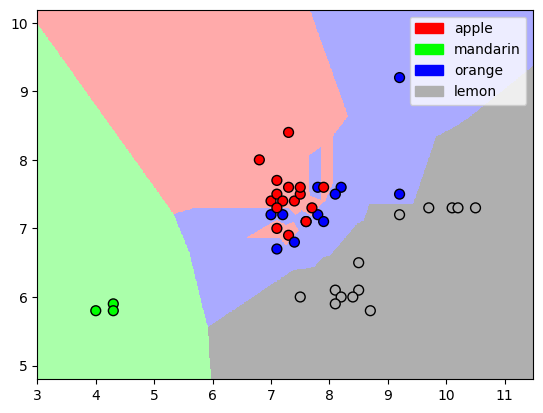

In [47]:
import numpy as np
#Need to upload adspy_shared_utilities
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 1, 'uniform')   # we choose 5 nearest neighbors

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

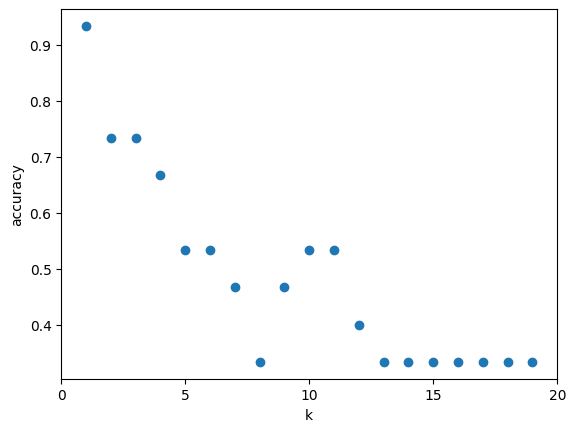

In [48]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

### How sensitive is k-NN classification accuracy to the train/test split proportion?

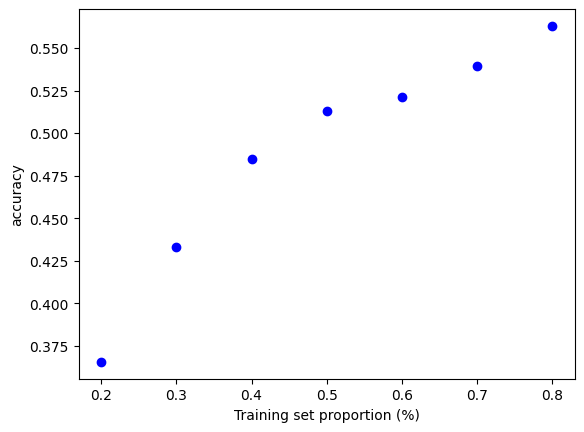

In [49]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');